In [65]:
import pandas as pd # data processing, csv file I/O
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# for getting the file from my Google Drive
data_path = '/content/drive/My Drive/Thesis/CVD_dataset.csv'

In [67]:
# Read the data from the CSV file
data = pd.read_csv(data_path)
data.head()

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Heart_Disease
0,Poor,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,No
1,Very Good,No,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,Yes
2,Very Good,Yes,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,No
3,Poor,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,Yes
4,Good,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,No


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Exercise                      308854 non-null  object 
 2   Skin_Cancer                   308854 non-null  object 
 3   Other_Cancer                  308854 non-null  object 
 4   Depression                    308854 non-null  object 
 5   Diabetes                      308854 non-null  object 
 6   Arthritis                     308854 non-null  object 
 7   Sex                           308854 non-null  object 
 8   Age_Category                  308854 non-null  object 
 9   Height_(cm)                   308854 non-null  int64  
 10  Weight_(kg)                   308854 non-null  float64
 11  BMI                           308854 non-null  float64
 12  Smoking_History               308854 non-nul

In [69]:
data.isnull().sum() # finding is there any null data

General_Health                  0
Exercise                        0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
Heart_Disease                   0
dtype: int64

In [70]:
data.duplicated().sum() # finding is there any duplicate data

784

In [71]:
# data.nunique()

In [72]:
data_without_duplicates = data.drop_duplicates(keep='first') # delete duplicate values and keep the first one
data_without_duplicates.info() # new data info after merging duplicate data

<class 'pandas.core.frame.DataFrame'>
Index: 308070 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308070 non-null  object 
 1   Exercise                      308070 non-null  object 
 2   Skin_Cancer                   308070 non-null  object 
 3   Other_Cancer                  308070 non-null  object 
 4   Depression                    308070 non-null  object 
 5   Diabetes                      308070 non-null  object 
 6   Arthritis                     308070 non-null  object 
 7   Sex                           308070 non-null  object 
 8   Age_Category                  308070 non-null  object 
 9   Height_(cm)                   308070 non-null  int64  
 10  Weight_(kg)                   308070 non-null  float64
 11  BMI                           308070 non-null  float64
 12  Smoking_History               308070 non-null  ob

In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [74]:
# Label Encoding (where data are non neumerical and more than binary statement)

# categorical_columns = ['General_Health', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Sex', 'Age_Category', 'Diabetes', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Heart_Disease']
for col in data_without_duplicates.columns:
    data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])

# col = data_without_duplicates.columns
# # solved this problem: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# def encode_column(data_without_duplicates, col, encoder):
#   data_without_duplicates.loc[:, col] = encoder.fit_transform(data_without_duplicates[col])

data_without_duplicates

<ipython-input-74-c0cf08a6f5b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])
<ipython-input-74-c0cf08a6f5b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_duplicates[col] = encoder.fit_transform(data_without_duplicates[col])
<ipython-input-74-c0cf08a6f5b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Heart_Disease
0,3,0,0,0,0,0,1,0,10,36,9,77,1,0,30,16,0
1,4,0,0,0,0,2,0,0,10,51,145,1226,0,0,30,0,1
2,4,1,0,0,0,2,0,0,8,49,180,1682,0,4,12,3,0
3,3,1,0,0,0,2,0,1,11,66,195,1267,0,0,30,30,1
4,2,0,0,0,0,0,0,1,12,77,180,868,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,0,0,0,0,0,1,1,54,159,1295,0,4,30,8,0
308850,1,1,0,0,0,2,0,1,9,66,121,604,0,8,15,48,0
308851,4,1,0,0,1,3,0,0,2,43,94,898,1,4,40,8,0
308852,4,1,0,0,0,0,0,1,9,69,152,810,0,3,30,12,0


In [75]:
# from sklearn.preprocessing import OneHotEncoder
# oneHatencoder = OneHotEncoder(sparse=False)  # Set sparse=False for easier handling

In [76]:
# categorical_columns = ['Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Heart_Disease']
# data_without_duplicates = pd.get_dummies(data_without_duplicates, columns=categorical_columns)
# data_without_duplicates

In [77]:
data_without_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308070 entries, 0 to 308853
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   General_Health                308070 non-null  int64
 1   Exercise                      308070 non-null  int64
 2   Skin_Cancer                   308070 non-null  int64
 3   Other_Cancer                  308070 non-null  int64
 4   Depression                    308070 non-null  int64
 5   Diabetes                      308070 non-null  int64
 6   Arthritis                     308070 non-null  int64
 7   Sex                           308070 non-null  int64
 8   Age_Category                  308070 non-null  int64
 9   Height_(cm)                   308070 non-null  int64
 10  Weight_(kg)                   308070 non-null  int64
 11  BMI                           308070 non-null  int64
 12  Smoking_History               308070 non-null  int64
 13  Alcohol_Consumption

In [78]:
# copied the actual data into data_count so that if i replace the encoded values that doesn't effect the actual data frame
data_count = data_without_duplicates.copy()

In [79]:
import matplotlib.pyplot as plt

In [80]:
data_count['Sex'] = data_count['Sex'].replace({
    0 : "Femlae", 1 : "Male"
})

gender_count = data_count['Sex'].value_counts()
print('Number of Total Female and Male')
gender_count

Number of Total Female and Male


Sex
Femlae    159738
Male      148332
Name: count, dtype: int64

In [81]:
# gender_disease_groups = data_without_duplicates.groupby(['Sex', 'Heart_Disease']).size().unstack()

In [82]:
# gender_disease_groups.plot(kind='bar', stacked=False)
# plt.xlabel('Gender')
# plt.ylabel('Count')
# plt.title('Heart Disease Status by Gender')
# plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
# plt.xticks(rotation=0)  # Rotate x-labels if needed
# plt.show()

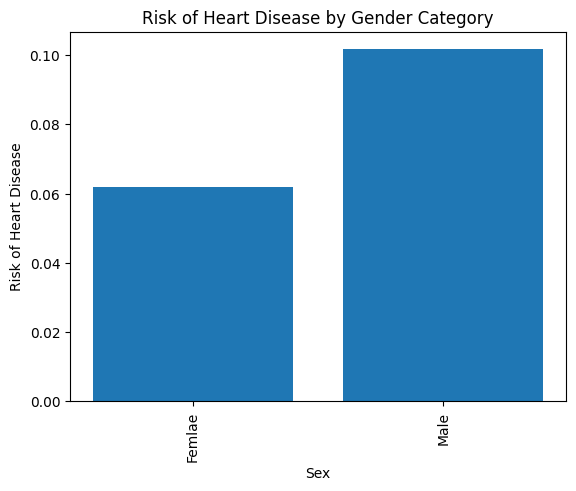

In [83]:
gender_group = data_without_duplicates.groupby('Sex')
risk_by_gender = gender_group['Heart_Disease'].mean()
gender_group_names = {
   0 : "Femlae", 1 : "Male"
}
plt.bar(gender_group_names.values(), risk_by_gender.values)
plt.xlabel('Sex')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Gender Category')
plt.xticks(rotation=90)
plt.show()

In [84]:
# relation betweeen age catagory and heart diseases.

data_count['Age_Category'] = data_count['Age_Category'].replace({
     0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older"
})
age_count = data_count['Age_Category'].value_counts().sort_values()
print('Number of People According to their Age (Sorted)')
age_count

Number of People According to their Age (Sorted)


Age_Category
25 to 29       15456
30 to 34       18359
18 to 24       18570
35 to 39       20554
75 to 79       20676
45 to 49       20903
40 to 44       21532
80 or older    22227
50 to 54       25024
55 to 59       28000
70 to 74       31063
60 to 64       32350
65 to 69       33356
Name: count, dtype: int64

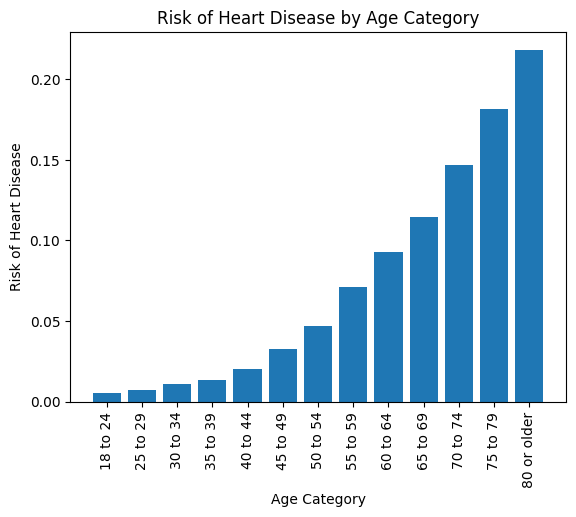

In [85]:
age_group = data_without_duplicates.groupby('Age_Category')
risk_by_age = age_group['Heart_Disease'].mean()
age_group_names = {
    0: "18 to 24",
    1: "25 to 29",
    2: "30 to 34",
    3: "35 to 39",
    4: "40 to 44",
    5: "45 to 49",
    6: "50 to 54",
    7: "55 to 59",
    8: "60 to 64",
    9: "65 to 69",
    10: "70 to 74",
    11: "75 to 79",
    12: "80 or older",
}
plt.bar(age_group_names.values(), risk_by_age.values)
plt.xlabel('Age Category')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Age Category')
plt.xticks(rotation=90)
plt.show()

In [86]:
# relation betweeen General_Health catagory and heart diseases.

data_count['General_Health'] = data_count['General_Health'].replace({
    0: "Excellent",
    1: "Very good",
    2: "Good",
    3: "Fair",
    4: "Poor"
})

general_health_count = data_count['General_Health'].value_counts().sort_values()
print('Number of People According to their General Health (Sorted)')
general_health_count

Number of People According to their General Health (Sorted)


General_Health
Fair          11331
Very good     35800
Excellent     55710
Good          95226
Poor         110003
Name: count, dtype: int64

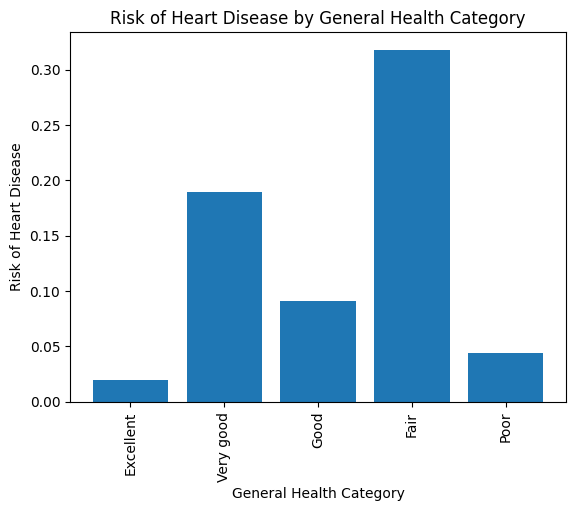

In [87]:
general_health_group = data_without_duplicates.groupby('General_Health')
risk_by_general_health = general_health_group['Heart_Disease'].mean()
general_health_group_names = {
    0: "Excellent",
    1: "Very good",
    2: "Good",
    3: "Fair",
    4: "Poor"
}
plt.bar(general_health_group_names.values(), risk_by_general_health.values)
plt.xlabel('General Health Category')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by General Health Category')
plt.xticks(rotation=90)
plt.show()


In [88]:
# relation betweeen Excercise catagory and heart diseases.

data_count['Exercise'] = data_count['Exercise'].replace({
    0: "No",
    1: "Yes"
})

excercise_count = data_count['Exercise'].value_counts().sort_values()
print('Number of People According to their Excercise (Sorted)')
excercise_count

Number of People According to their Excercise (Sorted)


Exercise
No      69427
Yes    238643
Name: count, dtype: int64

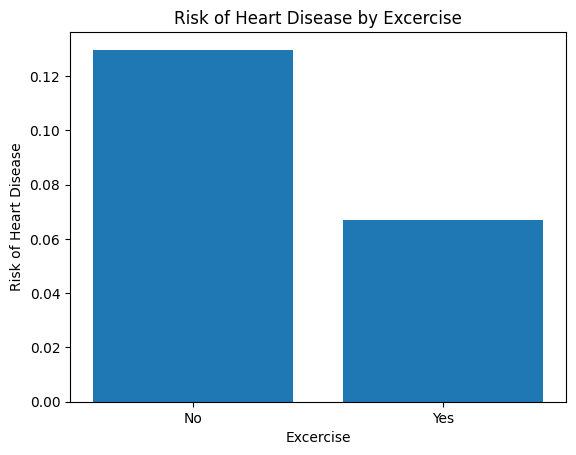

In [89]:
excercise_group = data_without_duplicates.groupby('Exercise')
risk_by_excercise = excercise_group['Heart_Disease'].mean()
excercise_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(excercise_group_names.values(), risk_by_excercise.values)
plt.xlabel('Excercise')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Excercise')
plt.xticks(rotation=0)
plt.show()


In [90]:
# relation betweeen Skin_Cancer catagory and heart diseases.

data_count['Skin_Cancer'] = data_count['Skin_Cancer'].replace({
    0: "No",
    1: "Yes"
})

skin_cancer_count = data_count['Skin_Cancer'].value_counts().sort_values()
print('Number of People According to their Skin_Cancer (Sorted)')
skin_cancer_count

Number of People According to their Skin_Cancer (Sorted)


Skin_Cancer
Yes     29982
No     278088
Name: count, dtype: int64

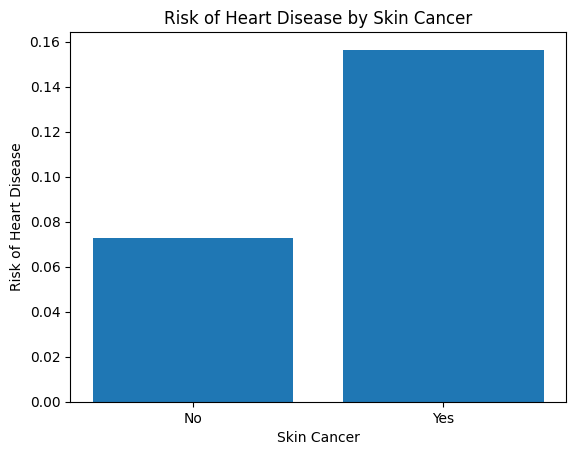

In [91]:
skin_cancer_group = data_without_duplicates.groupby('Skin_Cancer')
risk_by_skin_cancer = skin_cancer_group['Heart_Disease'].mean()
skin_cancer_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(skin_cancer_group_names.values(), risk_by_skin_cancer.values)
plt.xlabel('Skin Cancer')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Skin Cancer')
plt.xticks(rotation=0)
plt.show()


In [92]:
# relation betweeen Depression catagory and heart diseases.

data_count['Depression'] = data_count['Depression'].replace({
    0: "No",
    1 : 'Yes'
})

depression_count = data_count['Depression'].value_counts().sort_values()
print('Number of People According to their Depression (Sorted)')
depression_count

Number of People According to their Depression (Sorted)


Depression
Yes     61884
No     246186
Name: count, dtype: int64

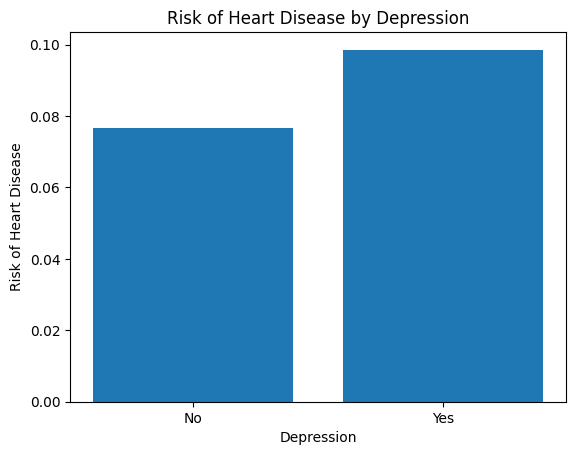

In [93]:
depression_group = data_without_duplicates.groupby('Depression')
risk_by_depression = depression_group['Heart_Disease'].mean()

depression_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(depression_group_names.values(), risk_by_depression.values)
plt.xlabel('Depression')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Depression')
plt.xticks(rotation=0)
plt.show()

In [94]:
# relation betweeen Smoking_History catagory and heart diseases.

data_count['Smoking_History'] = data_count['Smoking_History'].replace({
     0: "No",
    1: "Yes"
})

smoking_count = data_count['Smoking_History'].value_counts().sort_values()
print('Number of People According to their Smoking_History (Sorted)')
smoking_count

Number of People According to their Smoking_History (Sorted)


Smoking_History
Yes    125158
No     182912
Name: count, dtype: int64

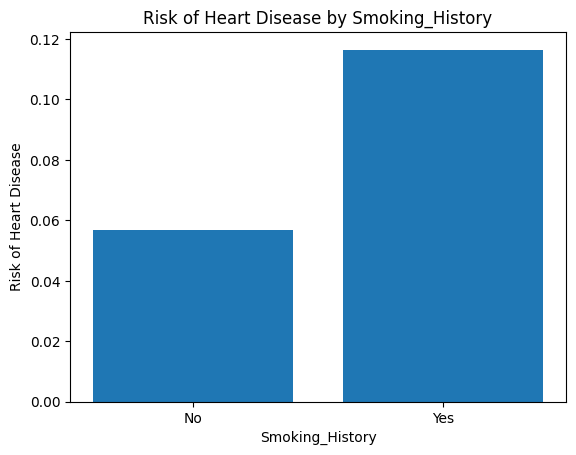

In [95]:
smoking_group = data_without_duplicates.groupby('Smoking_History')
risk_by_smoking = smoking_group['Heart_Disease'].mean()

smoking_group_names = {
    0: "No",
    1: "Yes"
}
plt.bar(smoking_group_names.values(), risk_by_smoking.values)
plt.xlabel('Smoking_History')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Smoking_History')
plt.xticks(rotation=0)
plt.show()

In [96]:
# relation betweeen Diabetes catagory and heart diseases.

data_count['Diabetes'] = data_count['Diabetes'].replace({
     0: "No",
     1: "No, pre-diabetes or borderline diabetes",
     2: "Yes",
     3: "Yes, but female told only during pregnancy"
})

diabetes_count = data_count['Diabetes'].value_counts().sort_values()
print('Number of People According to their Diabetes (Sorted)')
diabetes_count

Number of People According to their Diabetes (Sorted)


Diabetes
Yes, but female told only during pregnancy      2646
No, pre-diabetes or borderline diabetes         6896
Yes                                            40160
No                                            258368
Name: count, dtype: int64

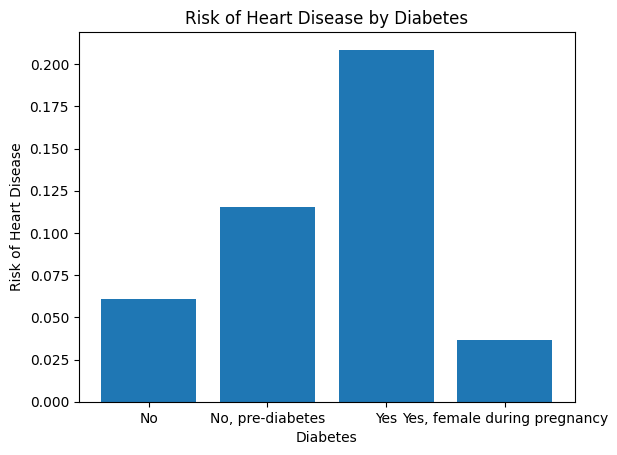

In [97]:
diabetes_group = data_without_duplicates.groupby('Diabetes')
risk_by_diabetes = diabetes_group['Heart_Disease'].mean()

diabetes_group_names = {
    0: "No",
     1: "No, pre-diabetes", # No, pre-diabetes or borderline diabetes AS No, pre-diabetes
     2: "Yes",
     3: "Yes, female during pregnancy" # Yes, but female told only during pregnancy AS Yes, female during pregnancy
}
plt.bar(diabetes_group_names.values(), risk_by_diabetes.values)
plt.xlabel('Diabetes')
plt.ylabel('Risk of Heart Disease')
plt.title('Risk of Heart Disease by Diabetes')
plt.xticks(rotation=0)
plt.show()

In [98]:
data_without_duplicates.columns

Index(['General_Health', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'Heart_Disease'],
      dtype='object')

In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [100]:
X = data_without_duplicates.drop('Heart_Disease', axis=1) # use all features except target column
y = data_without_duplicates['Heart_Disease'] # target data

In [101]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [103]:
!pip install scikeras

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [105]:
# function to create the model
def create_model(dropout_rate=0.5):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [106]:
# Hyperparameter tuning with cross-validation
model = KerasClassifier(build_fn=create_model, verbose=2, dropout_rate=0.5)
param_dist = {
    'batch_size': [32, 64],
    'epochs': [10,30],
    # 'dropout_rate': [0.3, 0.5, 0.7]
}

In [107]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# def keras_wrapper(dropout_rate=0.5):
#     return KerasClassifier(build_fn=lambda: create_model(dropout_rate), verbose=0)

# random_search = RandomizedSearchCV(estimator=keras_wrapper(), param_distributions=param_dist, n_iter=10, cv=10, scoring='accuracy', n_jobs=-1)
# random_result = random_search.fit(X_train, y_train)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=10, scoring='accuracy', n_jobs=-1)
random_result = random_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
